DAY 15 — Logistic Regression

* So far your models, Decision Tree and Random Forest worked like flowcharts. Ask yes/no questions, follow branches, reach a conclusion.
* Logistic Regression works completely differently. Instead of flowcharts it uses mathematics and probability to make predictions.
* It answers a different question than "survived or died." It answers — "what is the probability that this person survived?"
* If probability > 0.5 → predict SURVIVED
* If probability < 0.5 → predict DIED
* This is powerful because you don't just get a yes/no answer — you get a confidence score. "This passenger has 89% chance of survival" is much more useful than just "survived."

 TOPIC 1 — Linear Regression First (Quick Background)

To understand Logistic Regression you need to briefly understand Linear Regression.

Linear Regression draws a straight line through your data to predict a continuous number like predicting house price based on size
* Price = (weight × size) + bias

The model finds the best weight and bias values that make the line fit the data as closely as possible

But here's the problem if you try to use a straight line to predict survival (0 or 1), the line can give you values like -0.3 or 1.7. Those aren't valid probabilities. Probability must stay between 0 and 1.

This is the exact problem Logistic Regression solves

TOPIC 2 — The Sigmoid Function
>Logistic Regression takes the straight line output and squashes it into a value between 0 and 1 using something called the sigmoid function.

No matter what number you feed into sigmoid — even -1000 or +1000 — the output always comes out between 0 and 1. That's the magic.

* Very negative input → output close to 0 (definitely died)
* Very positive input → output close to 1 (definitely survived)
* Input near 0 → output near 0.5 (uncertain)

So Logistic Regression does this:
* Step 1:Calculate linear score = (w1 × Pclass) + (w2 × Age) + (w3 × Sex) + ... + bias
* Step 2: Feed score into sigmoid → get probability between 0 and 1
* Step 3: If probability > 0.5 → predict SURVIVED, else DIED

The model learns the best weights (w1, w2, w3...) during training so that the probabilities it outputs match the actual outcomes as closely as possible.

TOPIC 3 — Building Logistic Regression

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

df = pd.read_csv("Titanic.csv")

df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
X = df[["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch"]] 
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create
model_lr = LogisticRegression(max_iter=1000, random_state=42)
# max_iter=1000 — how many times the model adjusts weights during training
# default is 100 which sometimes isn't enough — 1000 is safe

# Train
model_lr.fit(X_train, y_train)

# Predict classes (0 or 1)
predictions = model_lr.predict(X_test)

# Predict probabilities — this is unique to Logistic Regression
probabilities = model_lr.predict_proba(X_test)
print(probabilities[:5])
# Output: [[0.82, 0.18],   — 82% chance died, 18% survived
#          [0.21, 0.79],   — 21% chance died, 79% survived
#          ...]

[[0.92224675 0.07775325]
 [0.76068133 0.23931867]
 [0.85081204 0.14918796]
 [0.0995168  0.9004832 ]
 [0.31950612 0.68049388]]


predict_proba() is the powerful method Decision Trees don't give you cleanly. Each row has two numbers — probability of dying and probability of surviving. They always add up to 1.

TOPIC 4 — Feature Scaling

Here's something important that Logistic Regression needs but Decision Trees don't, "feature scaling".

Look at your features:

* Age: values between 0 and 80
* Fare: values between 0 and 500
* Pclass: values between 1 and 3

Fare has much larger numbers than Pclass. In Logistic Regression this matters — the model uses weights and mathematics, so a feature with larger numbers can dominate the calculation unfairly just because of its scale, not because it's actually more important.

The fix is StandardScaler — it transforms each feature to have mean=0 and standard deviation=1:

In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit on training data only — learn the mean and std from training
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data using the same scaler — never fit on test data
X_test_scaled = scaler.transform(X_test)

* Critical rule — you fit the scaler ONLY on training data. Then use that same scaler to transform test data. If you fit on test data too, you're leaking information about the test set into your model — called data leakage — and your accuracy becomes unreliable.

* Think of it like this — you measure the average height of your class (training data) and use that as your reference. When a new student joins (test data) you measure them using the same reference — not a new one.

TOPIC 5 — Comparing All Three Models

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Decision Tree from Day 13
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

#logistic reasoning
lr_pred = model_lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
results = {
    "Decision Tree": dt_accuracy,
    "Random Forest": rf_accuracy,
    "Logistic Regression": lr_accuracy
}

for model_name, accuracy in results.items():
    print(f"{model_name}: {accuracy * 100:.2f}%")

Decision Tree: 75.42%
Random Forest: 80.45%
Logistic Regression: 81.01%


No single model is always best. It depends on your data, your problem, and your priorities. Comparing multiple models and picking the best one for your specific problem is called model selection — a key skill in ML.

TOPIC 6 — The Coefficients — What Did the Model Learn?

Unlike Decision Trees which give feature importance, Logistic Regression gives you coefficients the weights it assigned to each feature:

In [4]:
import pandas as pd

coef_df = pd.DataFrame({
    "Feature": ["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch"],
    "Coefficient": model_lr.coef_[0]
}).sort_values("Coefficient", ascending=False)

print(coef_df)

  Feature  Coefficient
2     Sex     2.611261
3    Fare     0.003422
1     Age    -0.032004
5   Parch    -0.129331
4   SibSp    -0.317606
0  Pclass    -0.927792


* Positive coefficient — higher value of this feature increases survival probability.
* Negative coefficient — higher value of this feature decreases survival probability.
* Sex should have a large positive coefficient — being female (1) strongly increases survival probability. Pclass should have a negative coefficient — higher class number (3rd class) decreases survival probability.
* This is interpretability — understanding exactly what your model learned and why it makes each prediction.

Task 1 — Build Logistic Regression (20 mins)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestClassifier(max_depth=10,random_state=42)

# Build and train
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)
rf.fit(X_train,y_train)

# Predict
lr_pred = lr.predict(X_test_scaled)
predict = rf.predict(X_test)
acc_score = accuracy_score(y_test, predict)

# Evaluate
print(f"Accuracy: {accuracy_score(y_test, lr_pred) * 100:.2f}%")
print(classification_report(y_test, lr_pred))
print(f"Random forest accuracy, {acc_score}")

# the accuracy of lr is 0.80 which is higher than random forest accuracy that is 0.79..

Accuracy: 79.89%
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

Random forest accuracy, 0.7988826815642458


Task 2 — Probability Predictions (20 mins)

In [ ]:
# Get probabilities for test set
proba = lr.predict_proba(X_test_scaled)

# Create a readable DataFrame
proba_df = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": lr_pred,
    "Prob_Died": proba[:, 0].round(2),
    "Prob_Survived": proba[:, 1].round(2)
}).reset_index(drop=True)

print(proba_df.head(10))

# 2nd passenger is the passenger where the model predicted with high confidence of 0.86
# 0th passenger is the one where model predicted incorrectly with confidence of 0.93 for death and only 0.07 for surviving.. 

   Actual  Predicted  Prob_Died  Prob_Survived
0       1          0       0.93           0.07
1       0          0       0.77           0.23
2       0          0       0.86           0.14
3       1          1       0.09           0.91
4       1          1       0.31           0.69
5       1          1       0.05           0.95
6       1          1       0.35           0.65
7       0          0       0.91           0.09
8       1          1       0.26           0.74
9       1          1       0.07           0.93


Task 3 — Compare All Three Models (15 mins)

logestic regression Accuracy: 79.89%
Random forest accuracy: 79.89%
Decision tree accuracy: 77.09%


C:\Users\katiy\AppData\Local\Temp\ipykernel_22740\4254295110.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=results, palette="Set2")


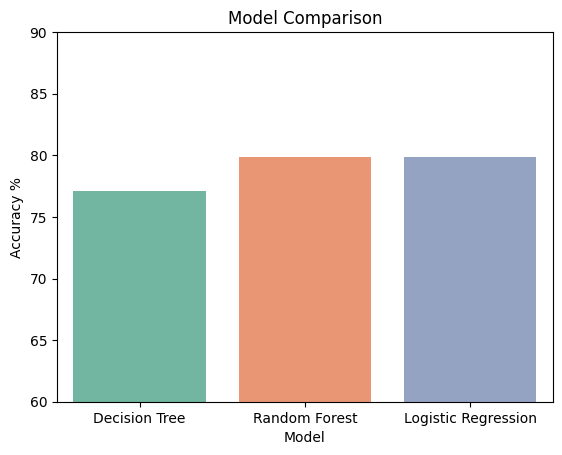

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier


# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestClassifier(n_estimators=100, max_depth=10,random_state=42)
dt = DecisionTreeClassifier(random_state=42, min_samples_leaf=5)

# Build and train
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)
rf.fit(X_train,y_train)
dt.fit(X_train, y_train)

# Predict
lr_predict = lr.predict(X_test_scaled)
rf_predict = rf.predict(X_test)
dt_predict = dt.predict(X_test)

#accuracy score
lr_acc_score = accuracy_score(y_test, lr_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
dt_acc_score = accuracy_score(y_test, dt_predict)

# Evaluate
print(f"logestic regression Accuracy: {lr_acc_score * 100:.2f}%")
print(f"Random forest accuracy: {rf_acc_score*100:.2f}%")
print(f"Decision tree accuracy: {dt_acc_score*100:.2f}%")

results = pd.DataFrame({
    "Model": ["Decision Tree", "Random Forest", "Logistic Regression"],
    "Accuracy": [dt_acc_score*100, rf_acc_score*100, lr_acc_score*100]
})

sns.barplot(x="Model", y="Accuracy", data=results, palette="Set2")
plt.title("Model Comparison")
plt.ylabel("Accuracy %")
plt.ylim(60, 90)
plt.show()

# limiting the sample leaf to 5 does a magnificient job not only the the accuracy improved it is now same as the rf and lr and all 3 has equal that is 79.9% accuracy..

Task 4 — Coefficients Analysis (15 mins)

In [ ]:
import pandas as pd

coef_df = pd.DataFrame({
    "Feature": ["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch"],
    "Coefficient": model_lr.coef_[0]
}).sort_values("Coefficient", ascending=False)

print(coef_df)

# sex has highest positive coefficient
# pclass has most negative coeff.
# no it doesnot match them.

  Feature  Coefficient
2     Sex     2.611261
3    Fare     0.003422
1     Age    -0.032004
5   Parch    -0.129331
4   SibSp    -0.317606
0  Pclass    -0.927792


Task 5 — Predict New Passengers with Probability (20 mins)

In [ ]:
new_passengers = pd.DataFrame({
    "Pclass": [1, 3, 2],
    "Age":    [25, 35, 8],
    "Sex":    [1, 0, 1],
    "Fare":   [100, 10, 30],
    "SibSp":  [0, 1, 0],
    "Parch":  [0, 2, 1]
})

# Scale using the SAME scaler — never create a new one
new_scaled = scaler.transform(new_passengers)

predictions = lr.predict(new_scaled)
probabilities = lr.predict_proba(new_scaled)

for i in range(len(predictions)):
    status = "SURVIVED" if predictions[i] == 1 else "DIED"
    confidence = max(probabilities[i]) * 100
    print(f"Passenger {i+1}: {status} with {confidence:.1f}% confidence")

# yes the confidence score makes sense for each passenger as the data suggest..

Passenger 1: SURVIVED with 95.1% confidence
Passenger 2: DIED with 94.6% confidence
Passenger 3: SURVIVED with 89.9% confidence
